<a href="https://colab.research.google.com/github/vardhamansankarc/DataTrained_Fliprobo_practice_projects/blob/main/Second_phase_Project_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn

                                                                 Titanic Survival Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
#not to get

In [ ]:
url = 'https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv'
df = pd.read_csv(url)

In [ ]:
print(df.head())
print(df)
print(df.info())
print(df.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [ ]:
def preprocess_data(data):
    data['Age'].fillna(data['Age'].median(), inplace=True)
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
    data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
    data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
    return data

df = preprocess_data(df)

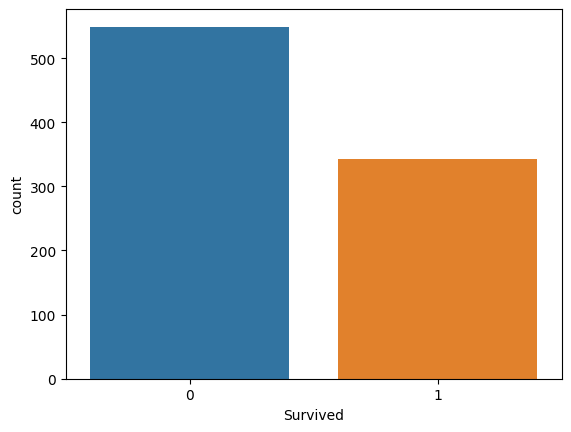

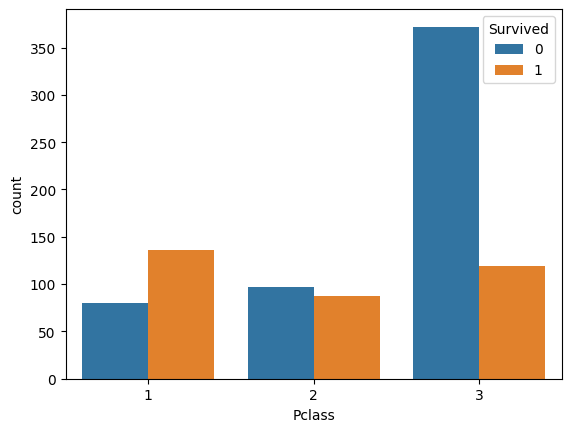

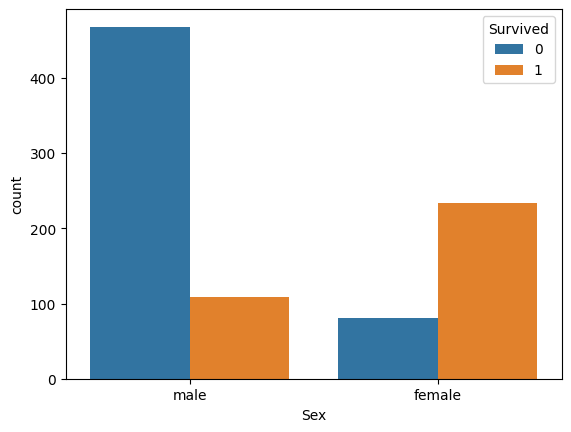

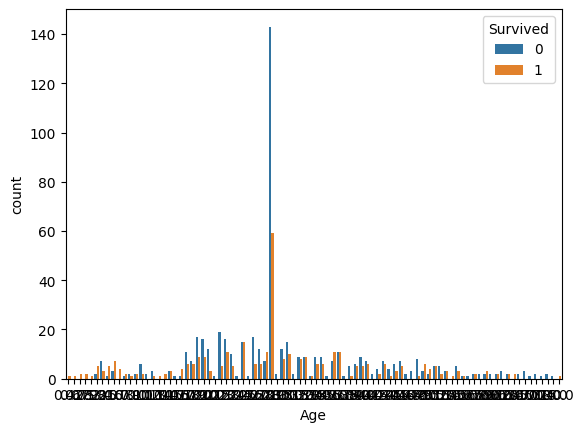

In [ ]:
sns.countplot(x='Survived', data=df)
plt.show()
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.show()
sns.countplot(x='Sex', hue='Survived', data=df)
plt.show()
sns.countplot(x='Age', hue='Survived', data=df)
plt.show()

In [ ]:
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch', 'FamilySize']
categorical_features = ['Pclass', 'Sex', 'Embarked']

numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, numerical_features),('cat', categorical_transformer, categorical_features)])




model = Pipeline(steps=[('preprocessor', preprocessor),('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare', 'SibSp',
                                                   'Parch', 'FamilySize']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the model: {accuracy:.4f}')

Accuracy of the model: 0.8212


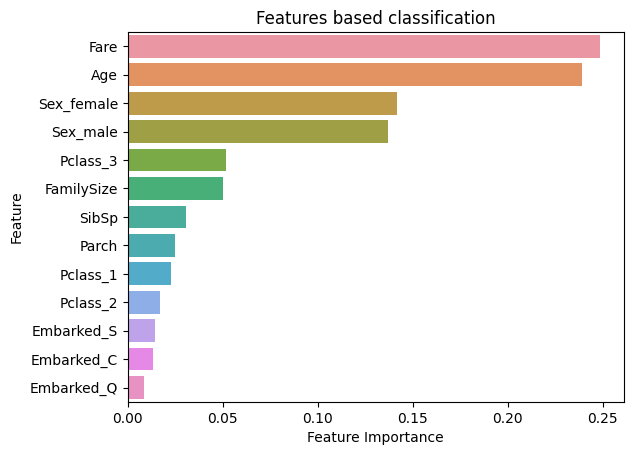

In [ ]:
if hasattr(model.named_steps['classifier'], 'feature_importances_'):
    feature_importances = model.named_steps['classifier'].feature_importances_
    one_hot_feature_names = model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out()
    features = numerical_features + list(one_hot_feature_names)
    feature_importance_df = pd.DataFrame({'feature': features, 'importance': feature_importances})
    feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)
    sns.barplot(x='importance', y='feature', data=feature_importance_df)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Features based classification')
    plt.show()

                                                                 Glass Identification Project

In [2]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [15]:
url = 'https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv'
column_names = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
df = pd.read_csv(url, header=None, names=column_names)
print(df.head())
print(df.info())
print(df.describe())
df.drop('Id', axis=1, inplace=True)
print(df.head())

   Id       RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0   1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1   2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2   3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3   4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4   5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64  


In [19]:
# print(df.columns)

# if 'Id' in df.columns:
#     df.drop('Id', axis=1, inplace=True)

print(df.isnull().sum())
X = df.drop('Type', axis=1)
y = df['Type']

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [22]:
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the model: {accuracy:.4f}')

              precision    recall  f1-score   support

           1       0.69      1.00      0.81        11
           2       0.90      0.64      0.75        14
           3       1.00      0.67      0.80         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.84        43
   macro avg       0.91      0.84      0.86        43
weighted avg       0.87      0.84      0.83        43

Confusion Matrix:
[[11  0  0  0  0  0]
 [ 4  9  0  0  0  1]
 [ 1  0  2  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  8]]
Accuracy of the model: 0.8372


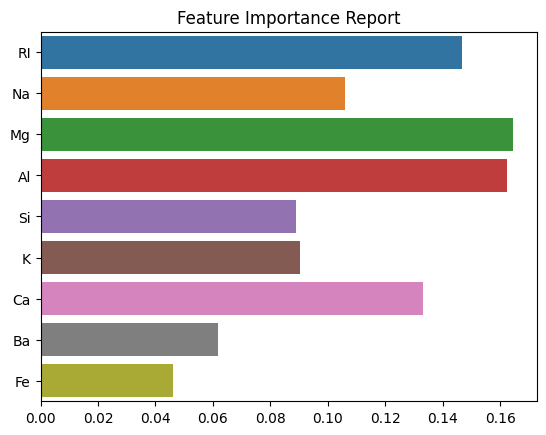

In [24]:
feature_importances = model.feature_importances_
features = X.columns
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importance Report')
plt.show()

                                                                 World Happiness Report  Project

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
url = 'https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv'
df = pd.read_csv(url)
print(df.head())
print(df.info())
print(df.describe())

       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938           

Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


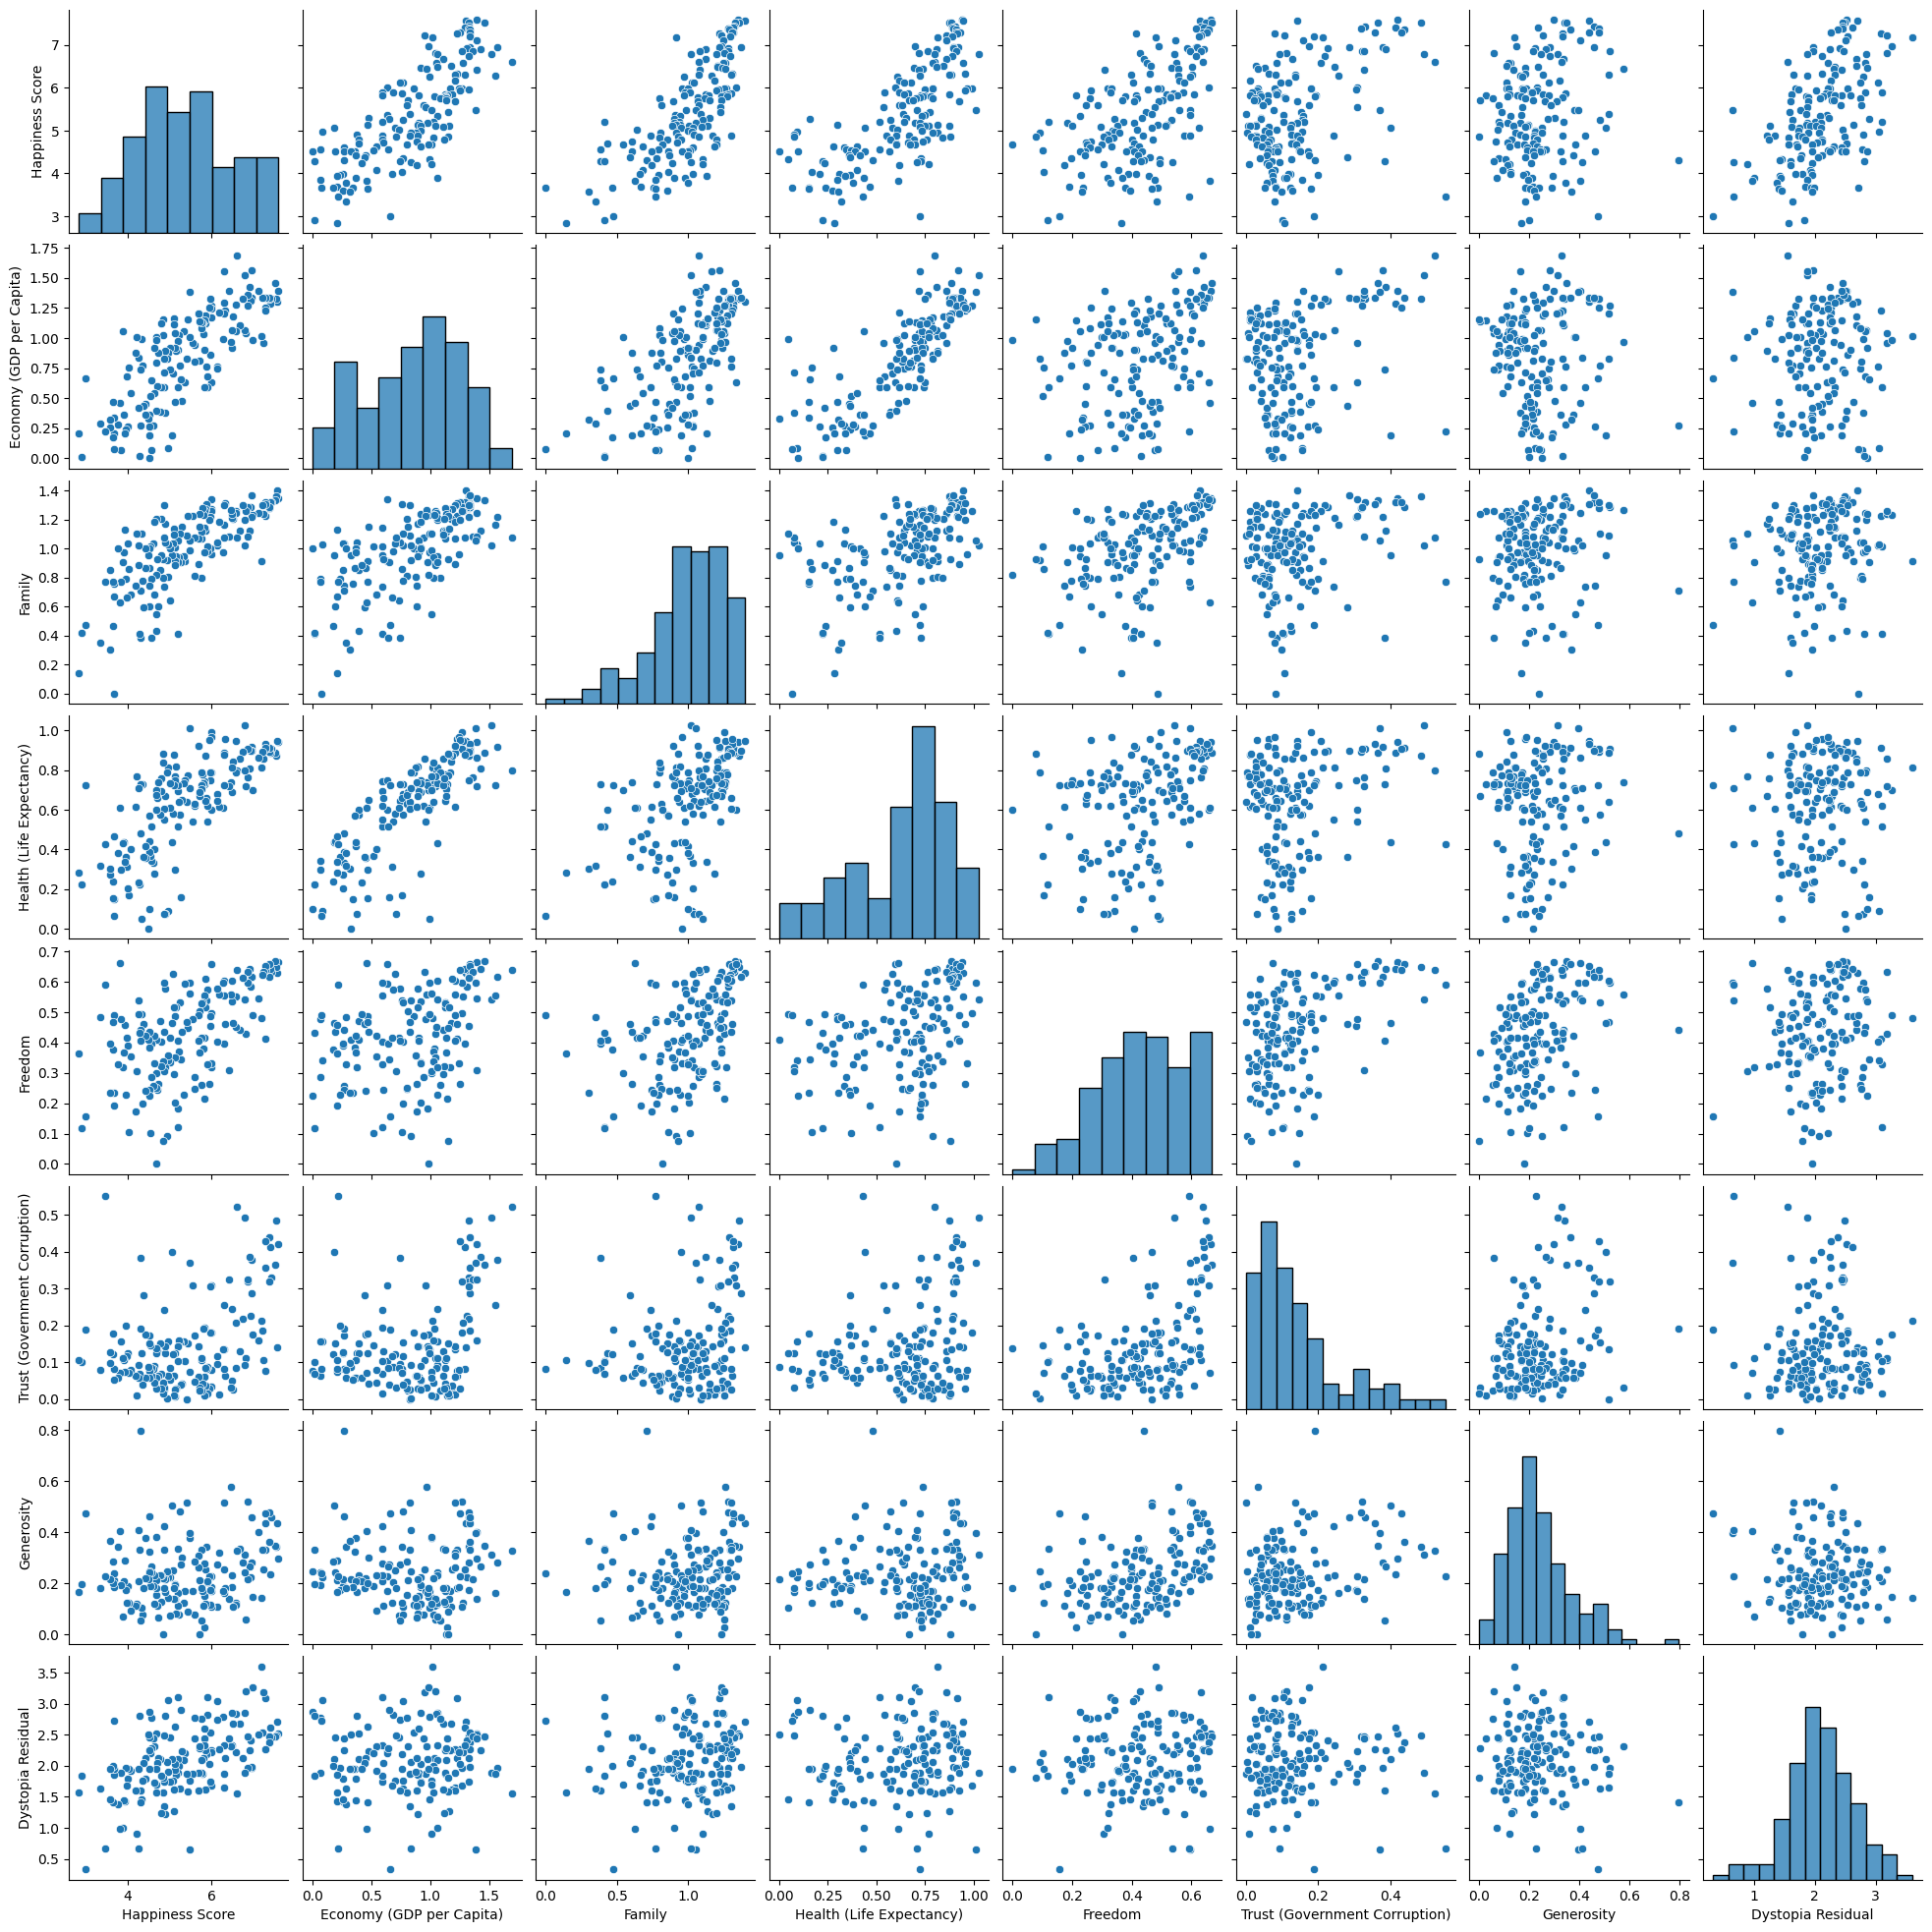

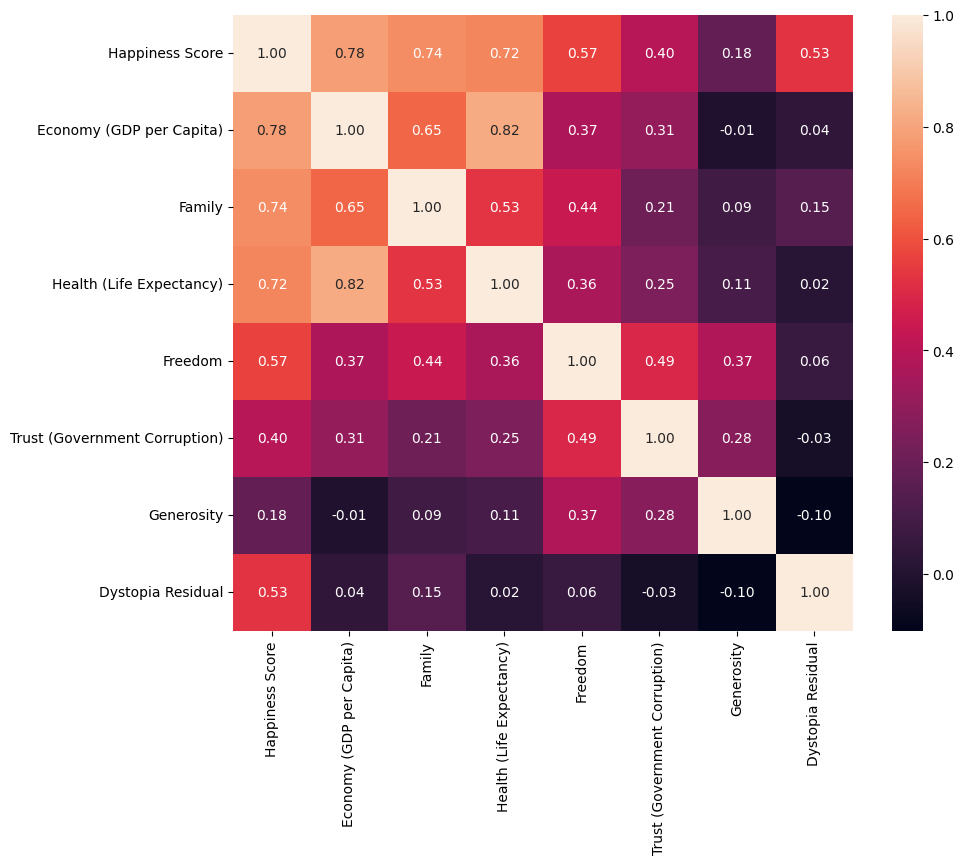

In [31]:
df.drop(['Country', 'Region', 'Happiness Rank', 'Standard Error'], axis=1, inplace=True)
print(df.isnull().sum())
sns.pairplot(df)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

In [32]:
X = df.drop('Happiness Score', axis=1)
y = df['Happiness Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [34]:
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 0.00
R-squared: 1.00


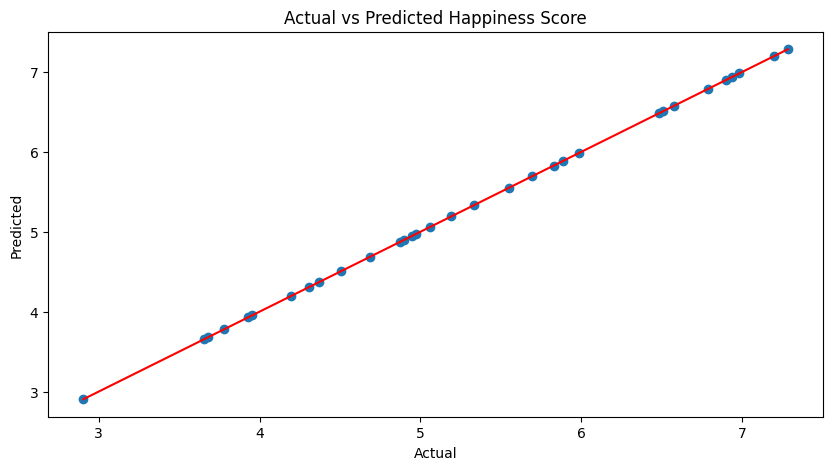

In [35]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Happiness Score')
plt.show()